### Encuesta Nacional de Gastos de los Hogares 2017-2018  (Indec)
###### Objetivo: estudiar los hábitos de consumo de los argentinos.

    id        --> Clave de identificación del hogar
    provincia --> codigo de provincia
    pondera   --> factor de expansión
    region    --> Código de región  (Pampeana, Patagonia, etc)
    subregion --> Código de subregión
    nc01      --> Código de artículo
    cc02      --> Descripción del código de artículo
    cc03      --> Frecuencia de compra
    cc04      --> Lugar de compra habitual

In [1]:
import pandas as pd

data = pd.read_table("engho2018_habitos.txt", sep="|")
data

,id,provincia,pondera,region,subregion,nc01,cc02,cc03,cc04
0,478229345,2,276,1,1A,1,...pan?,1,2.0
1,478229345,2,276,1,1A,2,...galletitas?,3,1.0
2,478229345,2,276,1,1A,3,"...harinas, fideos secos, arroz y cereales?",2,1.0
3,478229345,2,276,1,1A,4,...azúcar?,3,1.0
4,478229345,2,276,1,1A,5,...aceite?,3,1.0
...,...,...,...,...,...,...,...,...,...
517123,37138480,94,59,6,6B,20,...cerveza?,4,1.0
517124,37138480,94,59,6,6B,21,"...gaseosas (agua mineral, jugos, etcétera)?",3,1.0
517125,37138480,94,59,6,6B,22,"...congelados (verduras, carnes, comidas prepa...",3,1.0
517126,37138480,94,59,6,6B,23,...artículos de limpieza para el hogar?,3,1.0


In [2]:
data.info()    #Solo en la ultima hay nulos (110806), por eso es float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517128 entries, 0 to 517127
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         517128 non-null  int64  
 1   provincia  517128 non-null  int64  
 2   pondera    517128 non-null  int64  
 3   region     517128 non-null  int64  
 4   subregion  517128 non-null  object 
 5   nc01       517128 non-null  int64  
 6   cc02       517128 non-null  object 
 7   cc03       517128 non-null  int64  
 8   cc04       406322 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 35.5+ MB


In [3]:
data.isnull().sum()

id                0
provincia         0
pondera           0
region            0
subregion         0
nc01              0
cc02              0
cc03              0
cc04         110806
dtype: int64

In [4]:
data['cc04'].unique() #Los únicos valores son 1,2, 99 y nulos, 
#revisando la documentación: 1= Supermercado, 2= Otros negocios, 99= Ns/Nr

array([ 2.,  1., nan, 99.])

In [5]:
data = data.fillna(99)    #Reemplazo los nulos con 99
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517128 entries, 0 to 517127
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         517128 non-null  int64  
 1   provincia  517128 non-null  int64  
 2   pondera    517128 non-null  int64  
 3   region     517128 non-null  int64  
 4   subregion  517128 non-null  object 
 5   nc01       517128 non-null  int64  
 6   cc02       517128 non-null  object 
 7   cc03       517128 non-null  int64  
 8   cc04       517128 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 35.5+ MB


In [8]:
data["cc04"] = data["cc04"].astype("int64")   
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517128 entries, 0 to 517127
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         517128 non-null  int64 
 1   provincia  517128 non-null  int64 
 2   pondera    517128 non-null  int64 
 3   region     517128 non-null  int64 
 4   subregion  517128 non-null  object
 5   nc01       517128 non-null  int64 
 6   cc02       517128 non-null  object
 7   cc03       517128 non-null  int64 
 8   cc04       517128 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 35.5+ MB


In [9]:
data.head()

,id,provincia,pondera,region,subregion,nc01,cc02,cc03,cc04
0,478229345,2,276,1,1A,1,...pan?,1,2
1,478229345,2,276,1,1A,2,...galletitas?,3,1
2,478229345,2,276,1,1A,3,"...harinas, fideos secos, arroz y cereales?",2,1
3,478229345,2,276,1,1A,4,...azúcar?,3,1
4,478229345,2,276,1,1A,5,...aceite?,3,1


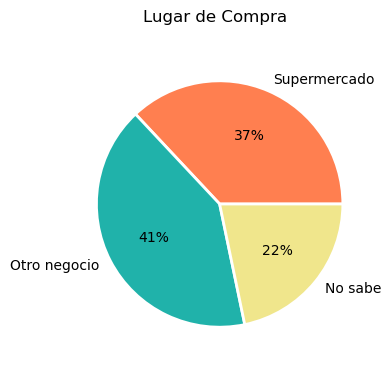

In [10]:
lugar = data.groupby(data.cc04).count()

import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(4,4))
fig1.suptitle("Lugar de Compra", fontsize=12)
ax1.pie(lugar.id, autopct="%1.0f%%", labels=["Supermercado","Otro negocio","No sabe"], wedgeprops={"linewidth":2, "edgecolor":"white"},
        textprops={"fontsize":10}, colors=["coral","lightseagreen", "khaki"] )

plt.show()

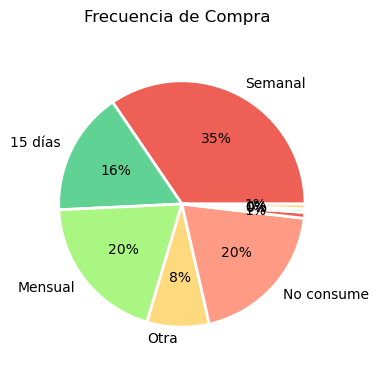

In [11]:
frecuencia = data.groupby(data.cc03).count() #Frecuencia de Compra

fig2, ax2 = plt.subplots(figsize=(4,4))
fig2.suptitle("Frecuencia de Compra", fontsize=12)
ax2.pie(frecuencia.id, autopct="%1.0f%%", labels=["Semanal","15 días", "Mensual","Otra", "No consume","", "", "",""],
        wedgeprops={"linewidth":2, "edgecolor":"white"}, textprops={"fontsize":10}, colors = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"])
        
plt.show()

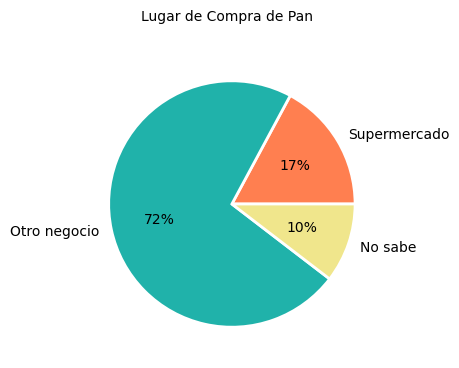

In [22]:
filtro = data.loc[data["nc01"]==1] #Compra de Pan
lugarpan = filtro.groupby(data.cc04).count()
fig3, ax3 = plt.subplots(figsize=(4,4))
fig3.suptitle("Lugar de Compra de Pan", fontsize=10)
ax3.pie(lugarpan.id, autopct="%1.0f%%", labels=["Supermercado","Otro negocio","No sabe"], wedgeprops={"linewidth":2, "edgecolor":"white"},
        textprops={"fontsize":10}, colors=["coral","lightseagreen", "khaki"])
plt.show()

In [13]:
lugarpan = filtro.groupby(data.cc04).count()
lugarpan

,id,provincia,pondera,region,subregion,nc01,cc02,cc03,cc04
cc04,,,,,,,,,
1,3693,3693,3693,3693,3693,3693,3693,3693,3693
2,15611,15611,15611,15611,15611,15611,15611,15611,15611
99,2243,2243,2243,2243,2243,2243,2243,2243,2243


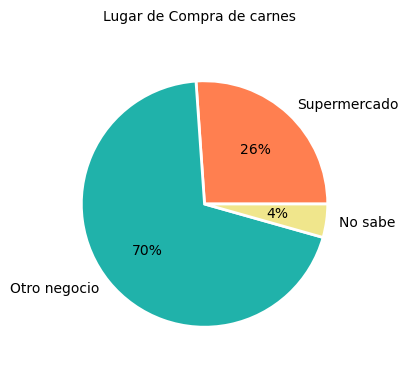

In [18]:
filtrocarne = data.loc[data["nc01"]==9] #Compra de Carne
lugarcarne = filtrocarne.groupby(data.cc04).count()
fig4, ax4 = plt.subplots(figsize=(4,4))
fig4.suptitle("Lugar de Compra de carnes", fontsize=10)
ax4.pie(lugarcarne.id, autopct="%1.0f%%", labels=["Supermercado","Otro negocio","No sabe"], wedgeprops={"linewidth":2, "edgecolor":"white"},
        textprops={"fontsize":10}, colors=["coral","lightseagreen", "khaki"])
plt.show()

In [23]:
filtrocarne

,id,provincia,pondera,region,subregion,nc01,cc02,cc03,cc04
8,478229345,2,276,1,1A,9,"...carnes (vacuna, ovina, cerdo, etcétera)?",1,2
32,824935596,2,271,1,1A,9,"...carnes (vacuna, ovina, cerdo, etcétera)?",3,2
56,549385244,2,264,1,1A,9,"...carnes (vacuna, ovina, cerdo, etcétera)?",1,2
80,64338930,2,245,1,1A,9,"...carnes (vacuna, ovina, cerdo, etcétera)?",5,99
104,635779227,2,283,1,1A,9,"...carnes (vacuna, ovina, cerdo, etcétera)?",1,1
...,...,...,...,...,...,...,...,...,...
517016,57618153,94,124,6,6B,9,"...carnes (vacuna, ovina, cerdo, etcétera)?",2,2
517040,551737923,94,123,6,6B,9,"...carnes (vacuna, ovina, cerdo, etcétera)?",5,99
517064,188896348,94,11,6,6B,9,"...carnes (vacuna, ovina, cerdo, etcétera)?",2,1
517088,127611813,94,68,6,6B,9,"...carnes (vacuna, ovina, cerdo, etcétera)?",1,2


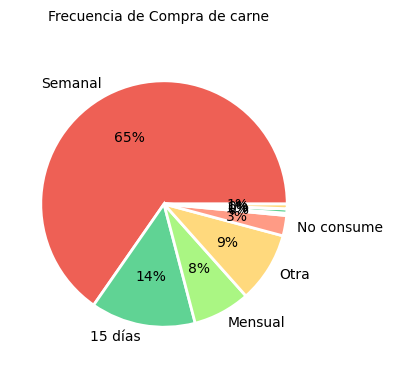

In [24]:
frecuenciacarne = filtrocarne.groupby(data.cc03).count() #Frecuencia de Compra de carne

fig2, ax2 = plt.subplots(figsize=(4,4))
fig2.suptitle("Frecuencia de Compra de carne", fontsize=10)
ax2.pie(frecuenciacarne.id, autopct="%1.0f%%", labels=["Semanal","15 días", "Mensual","Otra", "No consume","", "", "",""],
        wedgeprops={"linewidth":2, "edgecolor":"white"}, textprops={"fontsize":10}, colors = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"])
        
plt.show()

In [25]:
frecuenciacarne

,id,provincia,pondera,region,subregion,nc01,cc02,cc03,cc04
cc03,,,,,,,,,
1,14075,14075,14075,14075,14075,14075,14075,14075,14075
2,2964,2964,2964,2964,2964,2964,2964,2964,2964
3,1617,1617,1617,1617,1617,1617,1617,1617,1617
4,1994,1994,1994,1994,1994,1994,1994,1994,1994
5,574,574,574,574,574,574,574,574,574
6,67,67,67,67,67,67,67,67,67
7,119,119,119,119,119,119,119,119,119
8,5,5,5,5,5,5,5,5,5
99,132,132,132,132,132,132,132,132,132


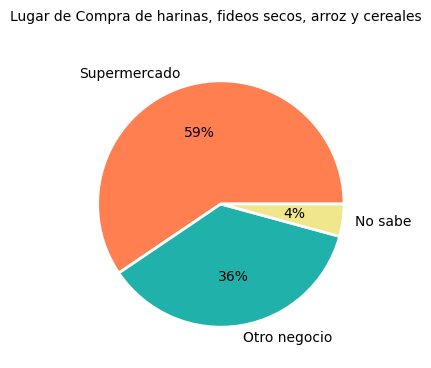

In [16]:
filtroharinas = data.loc[data["nc01"]==3] #Compra de Harinas, fideos secos, arroz y cereales
lugarharinas = filtroharinas.groupby(data.cc04).count()
fig5, ax5 = plt.subplots(figsize=(4,4))
fig5.suptitle("Lugar de Compra de harinas, fideos secos, arroz y cereales", fontsize=10)
ax5.pie(lugarharinas.id, autopct="%1.0f%%", labels=["Supermercado","Otro negocio","No sabe"], wedgeprops={"linewidth":2, "edgecolor":"white"},
        textprops={"fontsize":10}, colors=["coral","lightseagreen", "khaki"])
plt.show()

In [17]:
lugarharinas

,id,provincia,pondera,region,subregion,nc01,cc02,cc03,cc04
cc04,,,,,,,,,
1,12813,12813,12813,12813,12813,12813,12813,12813,12813
2,7821,7821,7821,7821,7821,7821,7821,7821,7821
99,913,913,913,913,913,913,913,913,913
